In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df =pd.read_csv("https://raw.githubusercontent.com/KrzysztofSzerenos/DMML2022_-Hublot/main/data/training_data.csv") 

## Preprocess

In [ ]:
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

## Stop words

In [ ]:
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('french')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

## Lemmatization

In [ ]:
#LEMMATIZATION
wl = WordNetLemmatizer()

## Cleaned sentences

In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df['clean_sentence'] = df['sentence'].apply(lambda x: finalpreprocess(x))
df.head()

,id,sentence,difficulty,clean_sentence
0,0,Les coûts kilométriques réels peuvent diverger...,C1,coûts kilométriques réels peuvent diverger sen...
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1,bleu couleur préférée aime vert
2,2,Le test de niveau en français est sur le site ...,A1,test niveau français site internet école
3,3,Est-ce que ton mari est aussi de Boston?,A1,mari aussi boston
4,4,"Dans les écoles de commerce, dans les couloirs...",B1,écoles commerce couloirs place financières arr...


## Implementation in the model



In [ ]:
X = df['clean_sentence']
y = df['difficulty']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
np.unique(y, return_counts=True)

(array(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], dtype=object),
 array([813, 795, 795, 792, 798, 807]))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()  # vectorization
vectorizer.fit(X,y)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
classifier = LogisticRegression(max_iter=1000, solver='lbfgs')
classifier.fit(X_train_vec, y_train)
log_reg_pred = classifier.predict(X_test_vec)

ACCURACY SCORE:
0.4198
CLASSIFICATION REPORT:
	Precision: 0.4423
	Recall: 0.4198
	F1_Score: 0.4161
0.4198


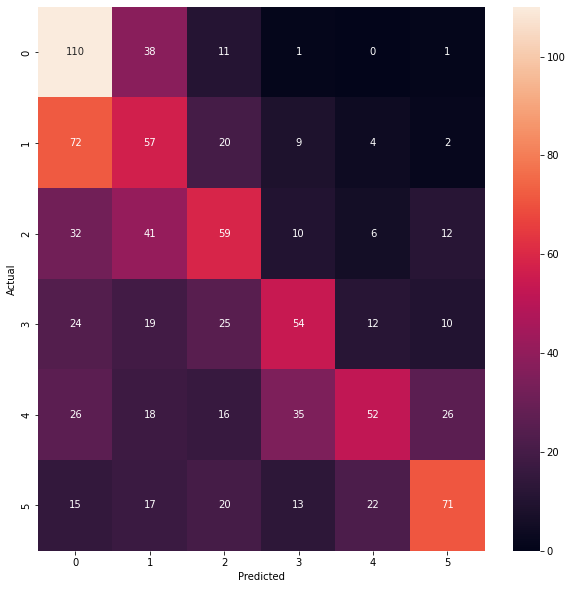

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def evaluate(test, pred):
  precision = precision_score(test, pred, average='weighted')
  recall = recall_score(test, pred, average='weighted')
  f1= f1_score(test, pred, average='weighted')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}')
evaluate(y_test, log_reg_pred)
def accuracy_conf_mat(test, pred):
  print(round(accuracy_score(test, pred), 4))
  conf_mat = confusion_matrix(test, pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, log_reg_pred)